<a href="https://colab.research.google.com/github/RusianaH/Costumer_churn_prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor libaray & load dataset

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline

In [136]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/challange2/Data Train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [138]:
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [139]:
df.shape

(4250, 20)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


# EDA (Exploratory Data Analysis)

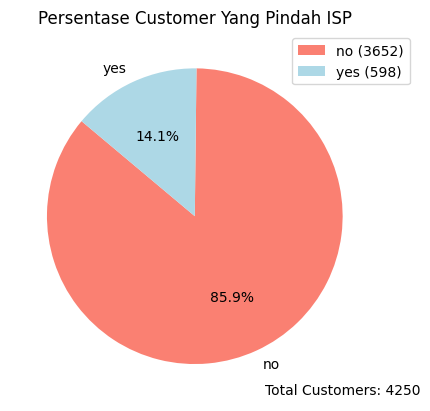

In [142]:
churn_counts = df['churn'].value_counts()
total_customers = churn_counts.sum()

churned = churn_counts / total_customers

churned.plot(kind='pie', colors=['salmon', 'lightblue'], autopct='%1.1f%%', startangle=140)

plt.title('Persentase Customer Yang Pindah ISP')
plt.ylabel('')
labels = ['no', 'yes']
legend_labels = ['{} ({})'.format(label, churn_counts[i]) for i, label in enumerate(labels)]
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.text(1, -1.2, 'Total Customers: {}'.format(total_customers), ha='center')

plt.show()

In [143]:
# memisahkan feature numerical dengan categorical
numerical = []
categorical = []
for i in df.columns:
  if df[i].dtype == 'object':
    categorical.append(i)
  else:
    numerical.append(i)
print('jumlah = ',len(numerical))
print('numeric = ',numerical)
print('jumlah = ',len(categorical))
print('categoric = ',categorical)

jumlah =  15
numeric =  ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
jumlah =  5
categoric =  ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


## Statistical summary for **numeric**

In [144]:
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


## Statistical summary for categorical

In [145]:
df[categorical].describe().transpose()

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [146]:
df.duplicated().sum()

0

## Analysist for numeric

In [147]:
print(numerical)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [148]:
nums = [['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

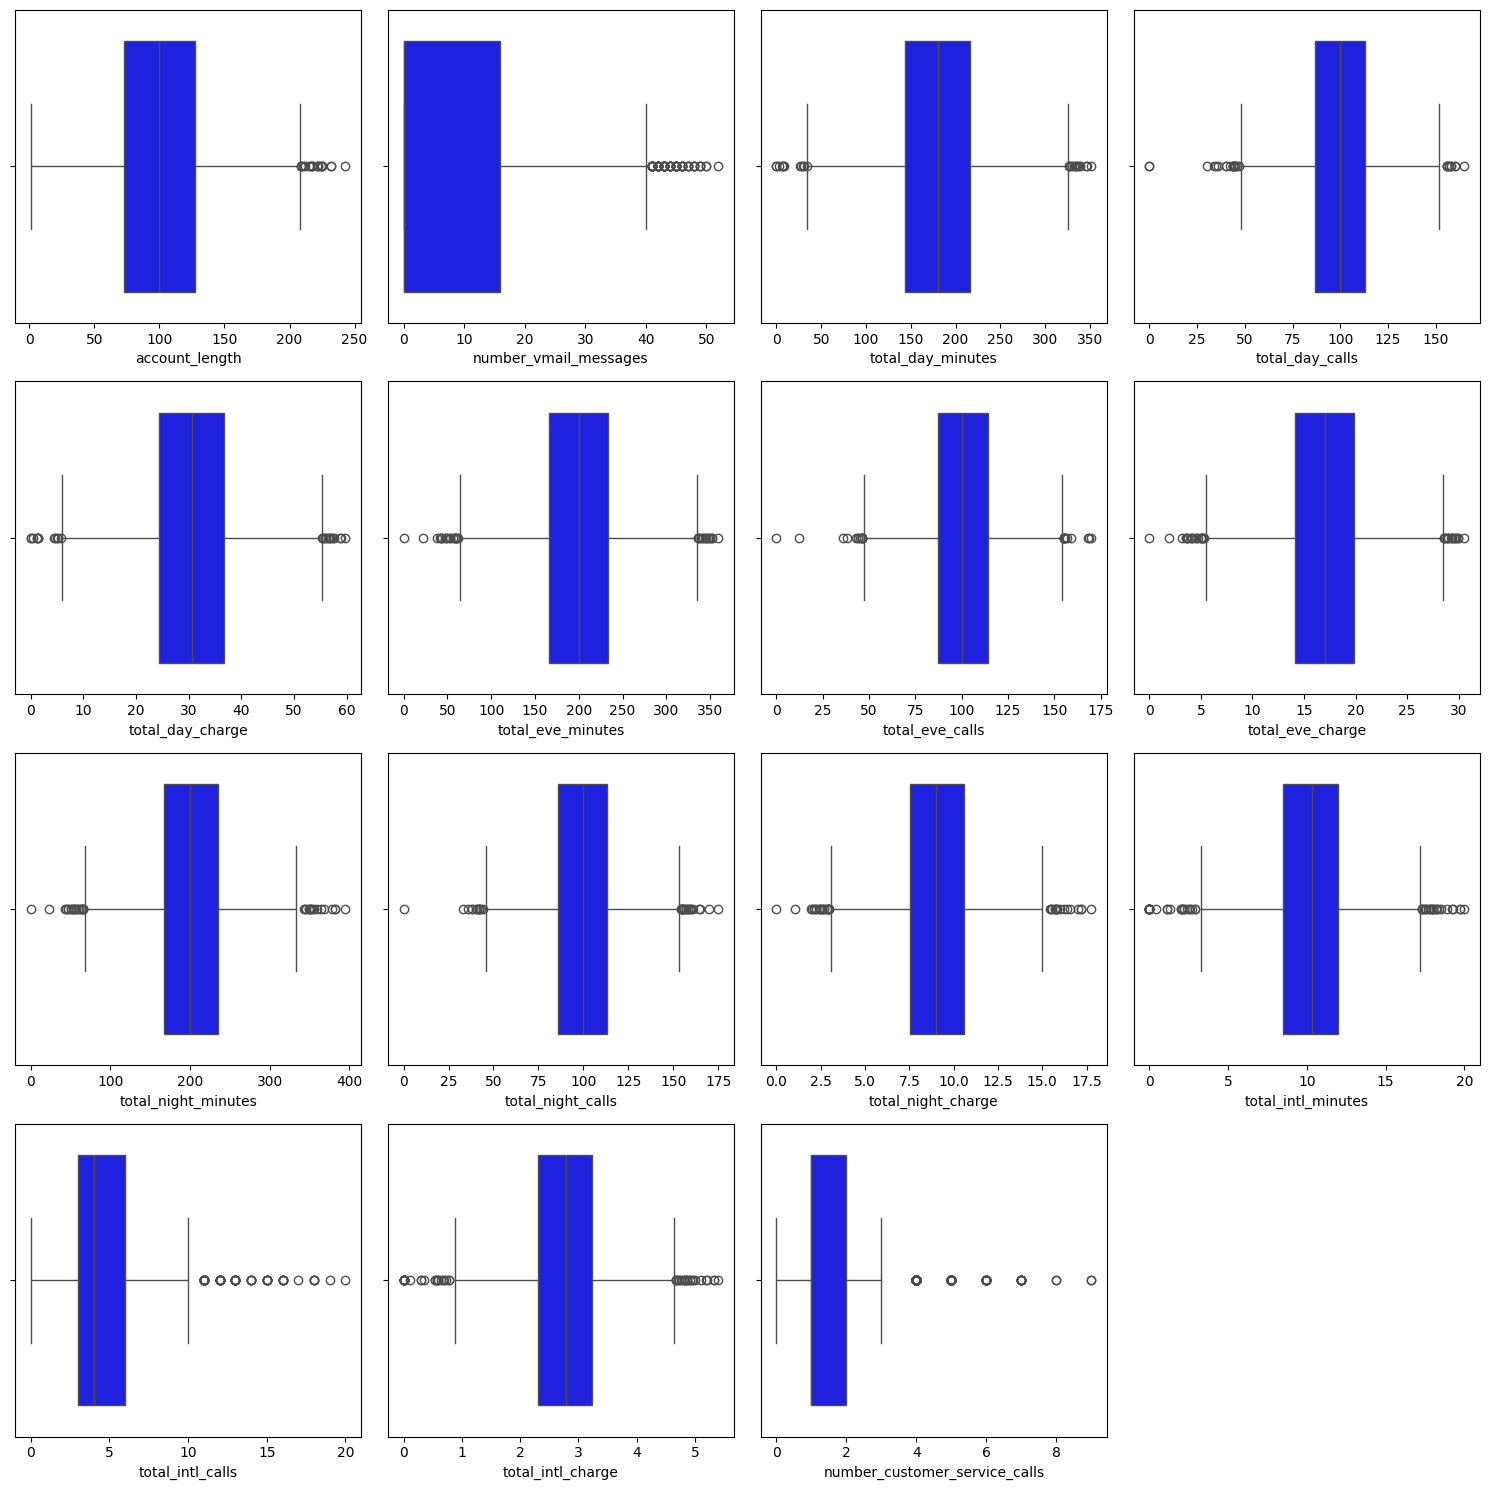

In [149]:
import seaborn as sns
plt.figure(figsize=(15,15))

numerical_columns = nums[0]

for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column], color="blue")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

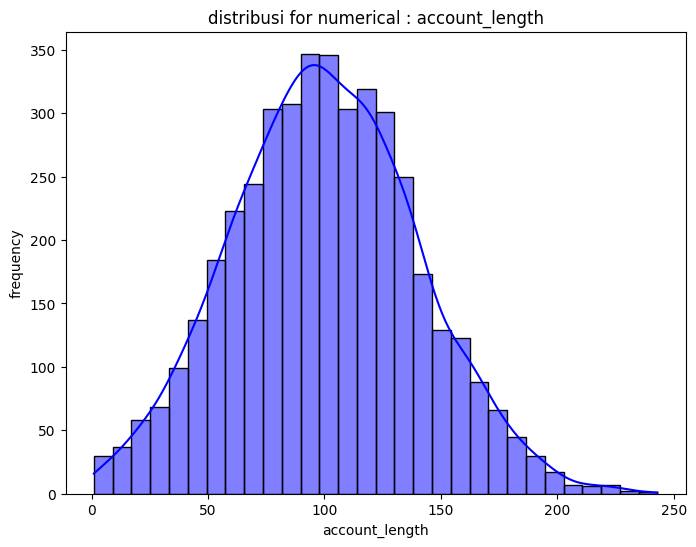

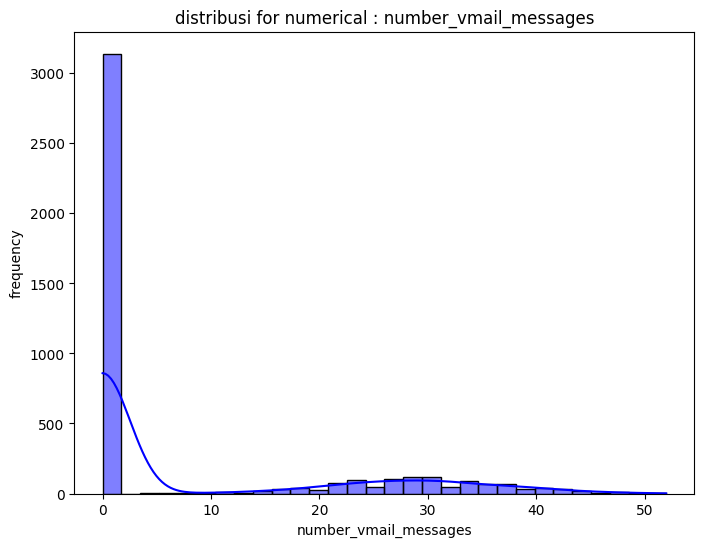

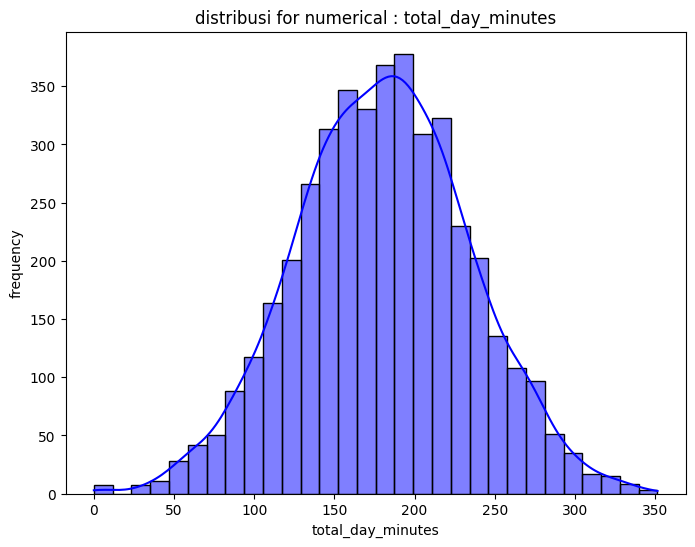

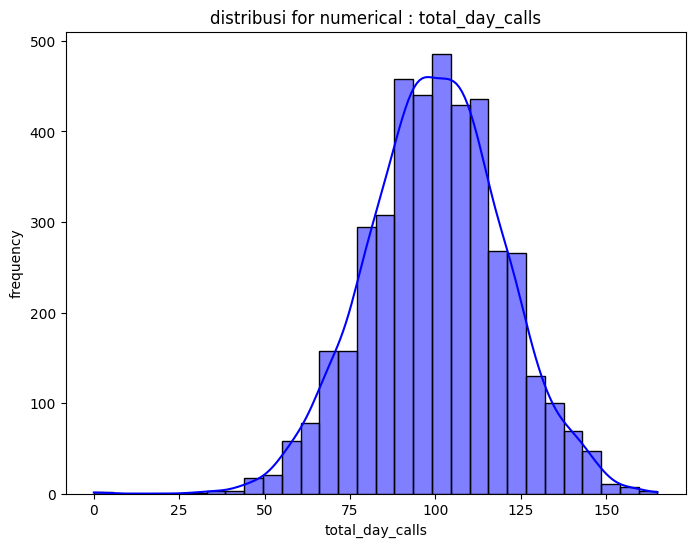

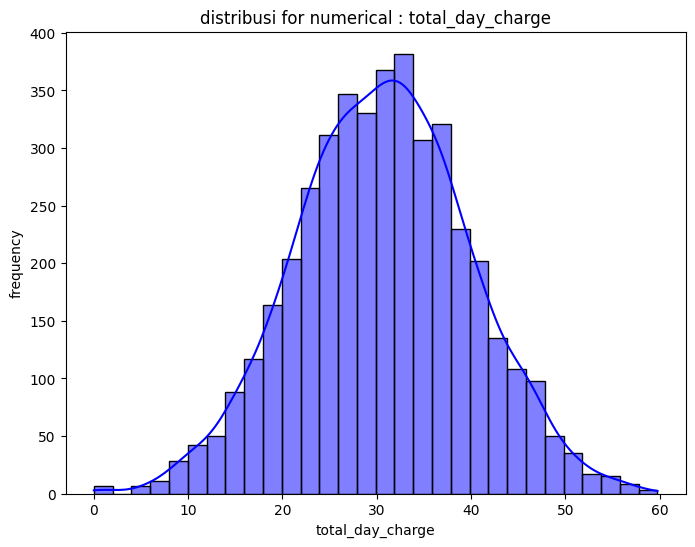

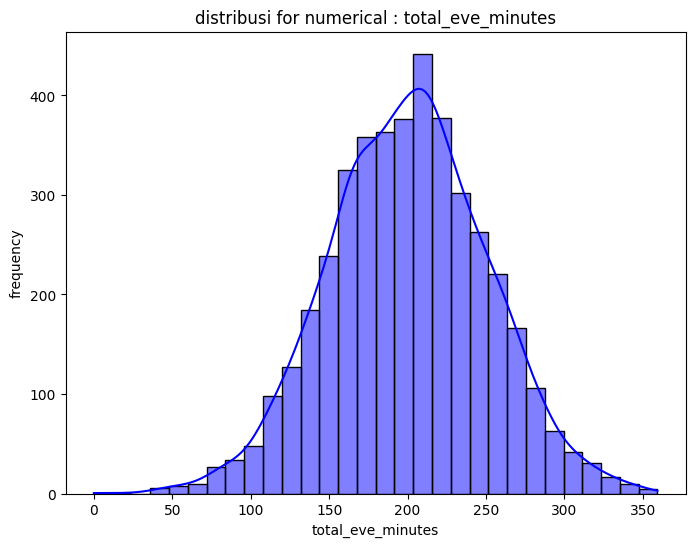

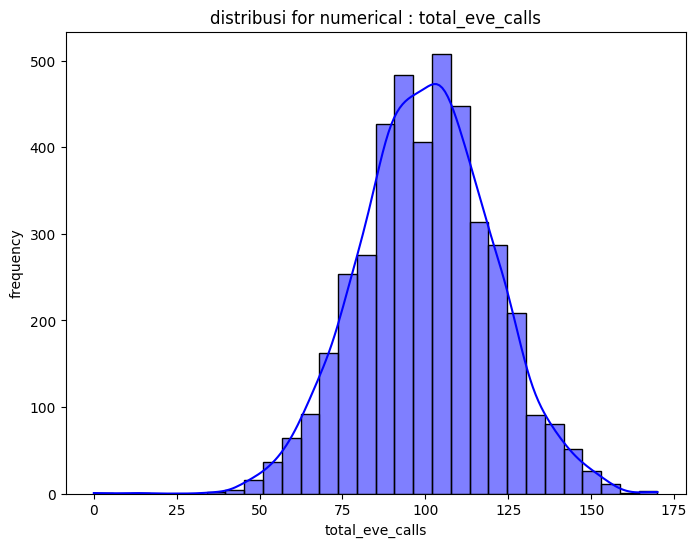

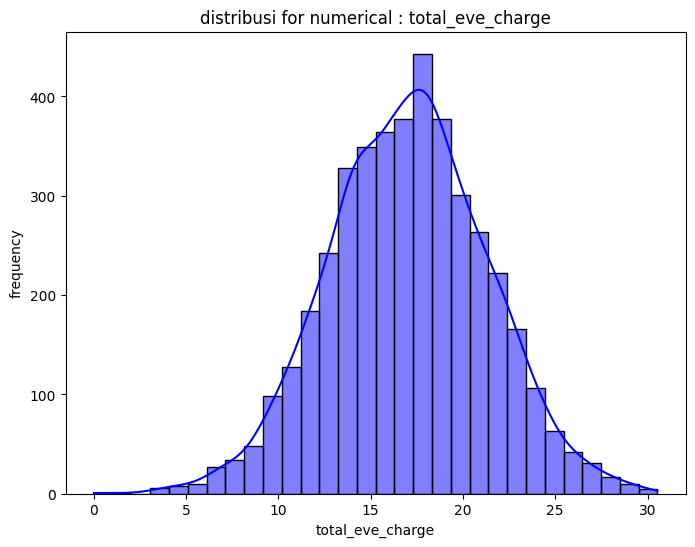

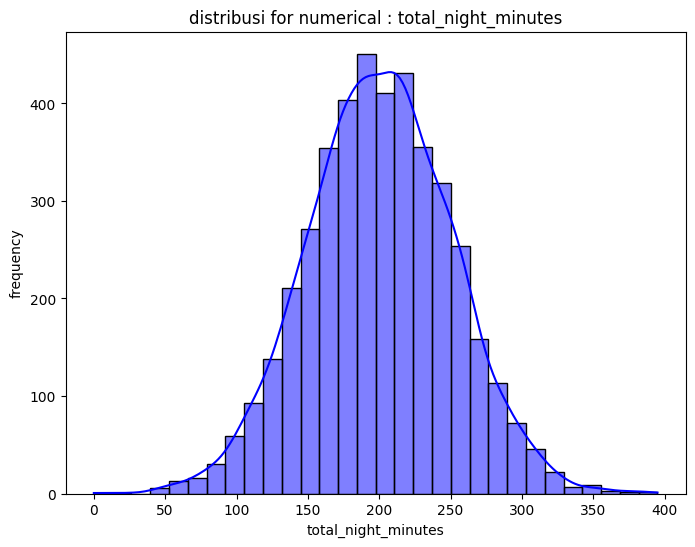

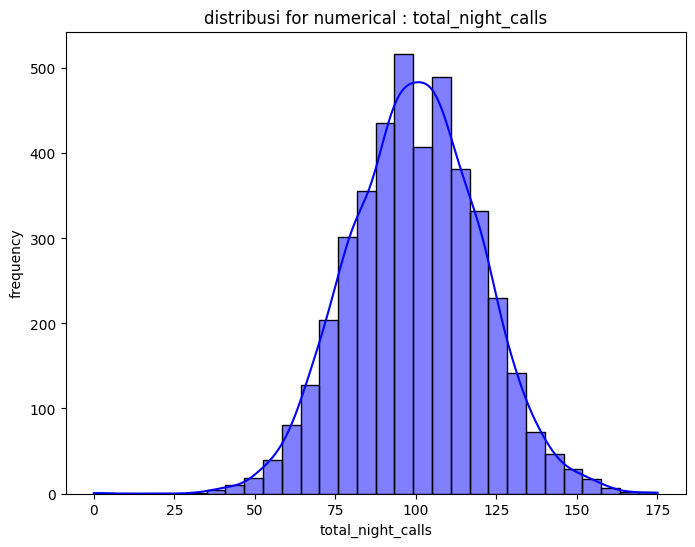

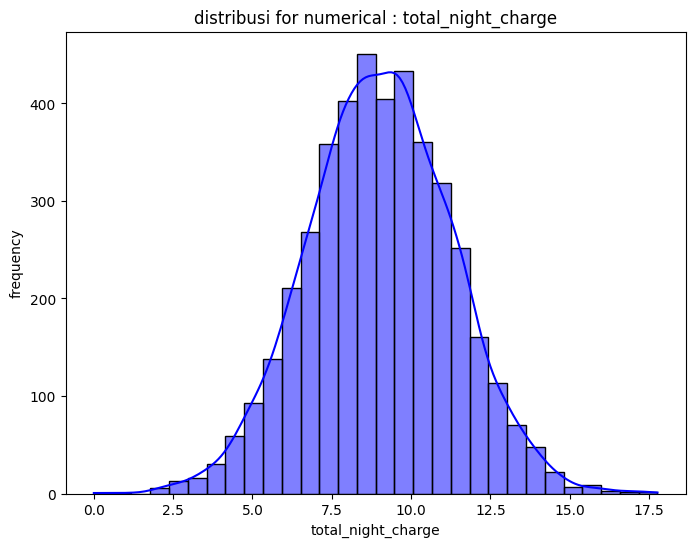

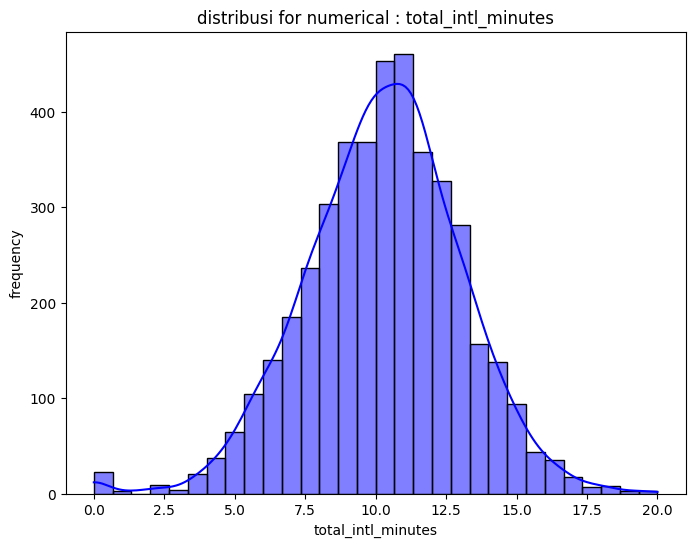

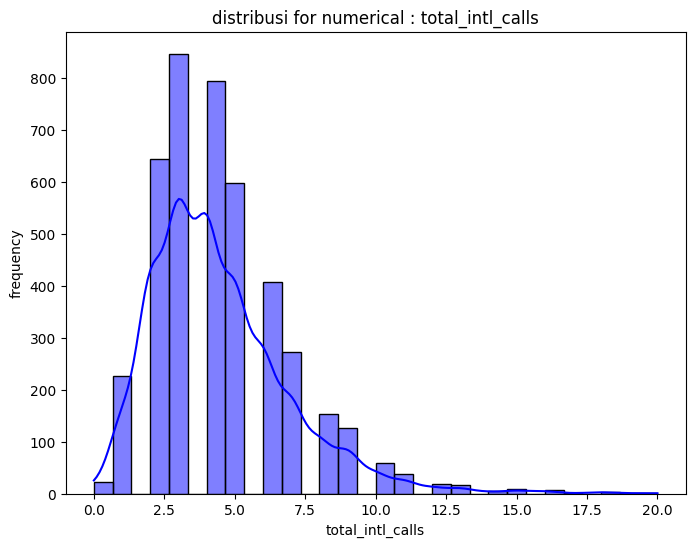

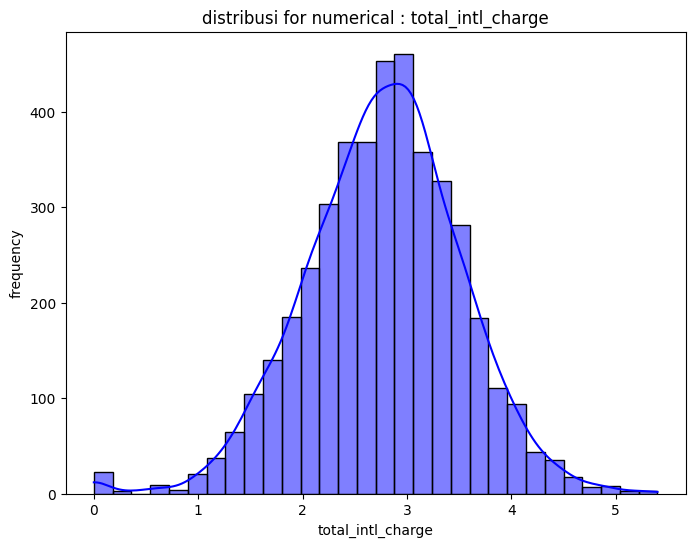

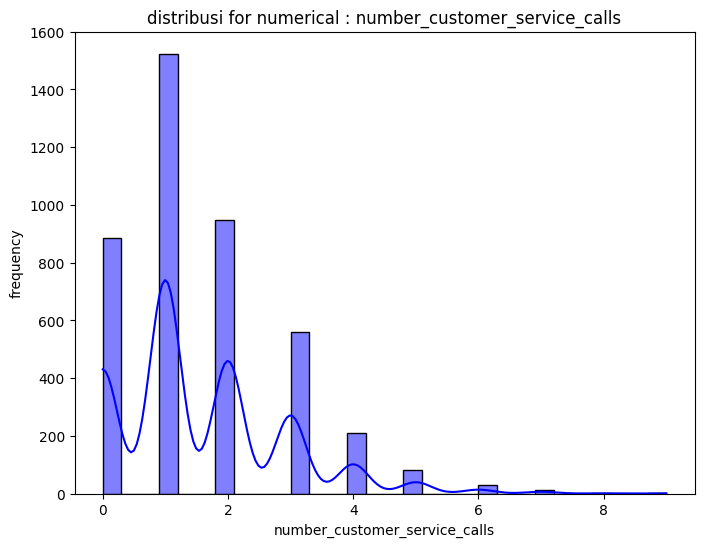

In [150]:
import seaborn as sns

for feature in numerical:
  plt.figure(figsize= (8,6))
  sns.histplot(df[feature], kde=True, color='blue', bins=30)
  plt.title(f'distribusi for numerical : {feature}')
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.show()

**hasil oberservasi** data numeric tinggi outlier

**insight**

1. grafik menunjukkan persebaran data positif
1. outlier paling tinggi yaitu custumer service calls





In [151]:
nums = df[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

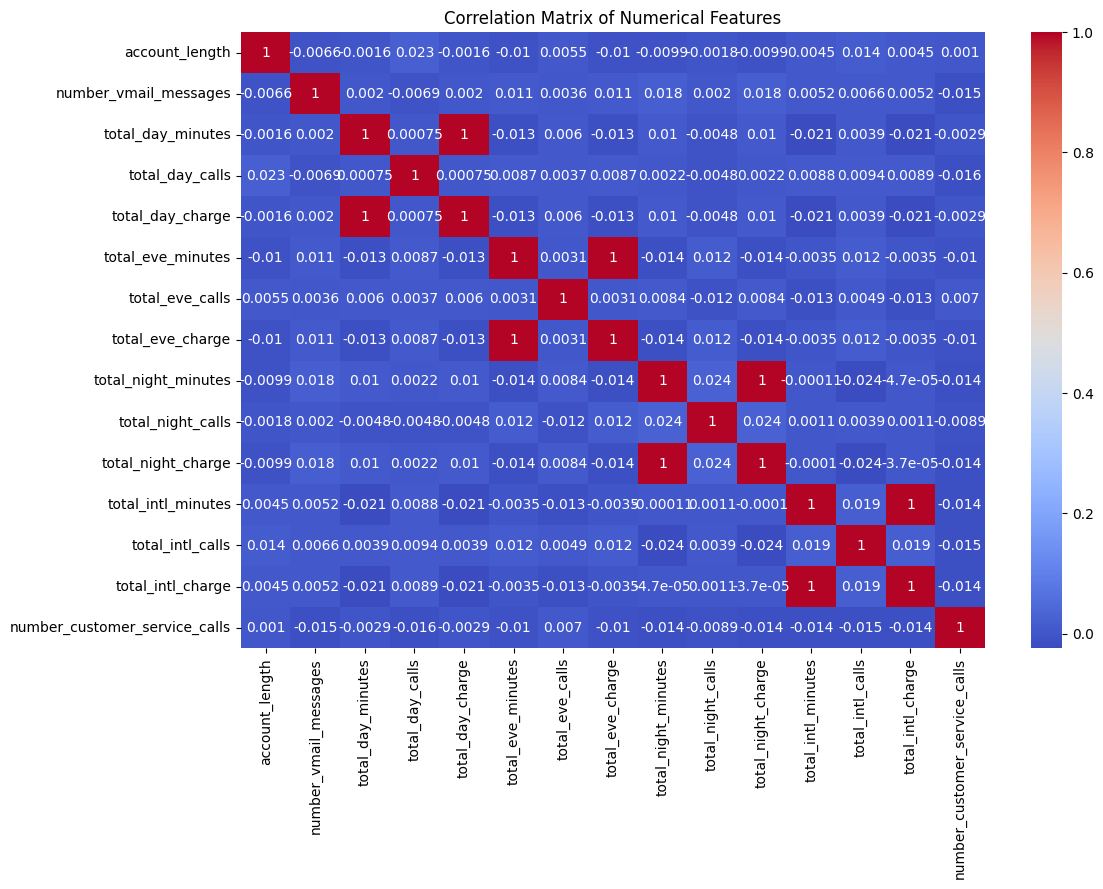

In [152]:
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


dari hasil tabel corelasi diatas,
    ['total_day_minutes', 'total_night_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_day_calls', 'total_night_calls', 'total_eve_calls']
memiliki korelasi tinggi maka kolom tersebut dihapus karena memiliki informasi yang sama

<ipython-input-155-441cba8ac008>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='total_day_minutes', data=df, palette='Pastel1')


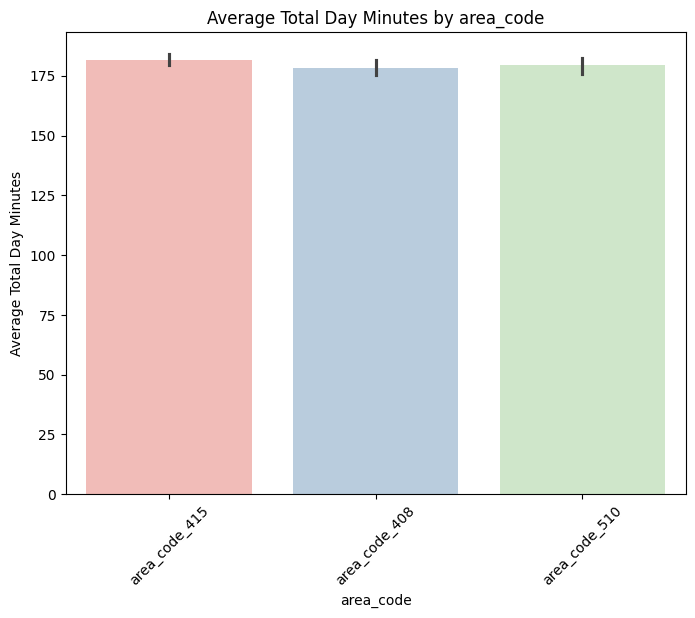

<ipython-input-155-441cba8ac008>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='total_day_minutes', data=df, palette='Pastel1')


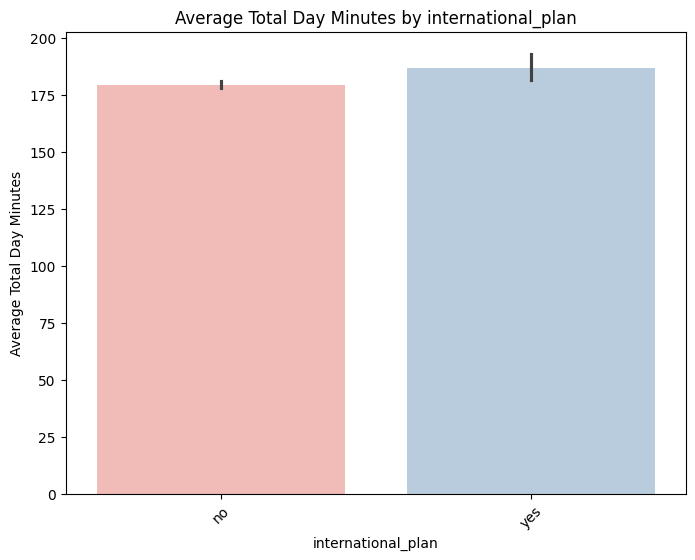

<ipython-input-155-441cba8ac008>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='total_day_minutes', data=df, palette='Pastel1')


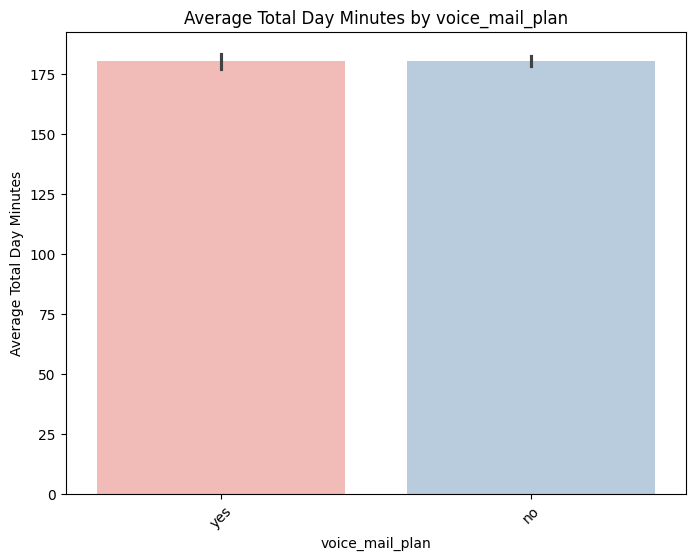

<ipython-input-155-441cba8ac008>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='total_day_minutes', data=df, palette='Pastel1')


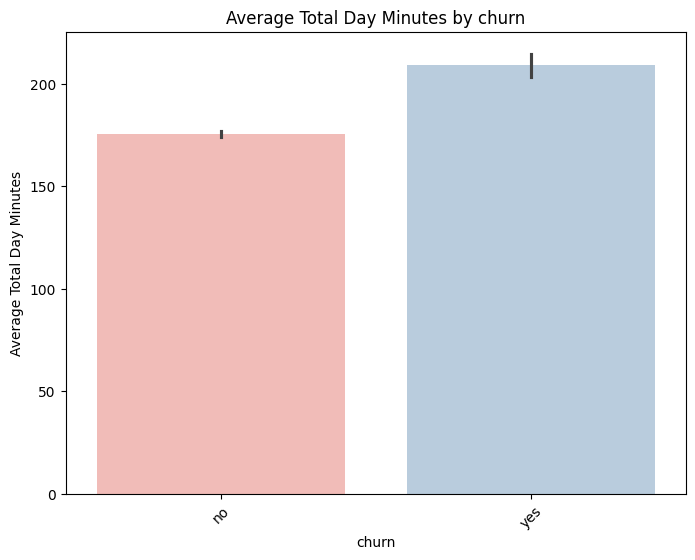

In [155]:
# Membuat list fitur numerik dan kategorikal
numerical = [col for col in df.columns if col not in ['state'] and df[col].dtype != 'object']
categorical = [col for col in df.columns if col not in ['state'] and df[col].dtype == 'object']

# Membandingkan nilai rata-rata dari fitur numerik berdasarkan kategori dari fitur kategorikal
for feature in categorical:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='total_day_minutes', data=df, palette='Pastel1')
    plt.title(f'Average Total Day Minutes by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Total Day Minutes')
    plt.xticks(rotation=45)
    plt.show()


## Analysis for categorical columns

<ipython-input-65-038273071b3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_state.index, y=top_state.values, palette='viridis')


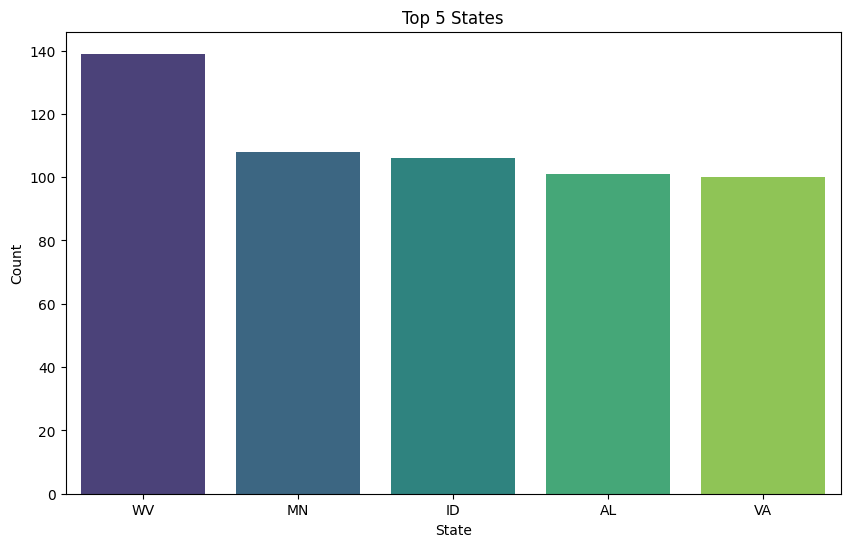

In [65]:
# State
state_counts = df['state'].value_counts()
top_state = state_counts.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_state.index, y=top_state.values, palette='viridis')

plt.title('Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

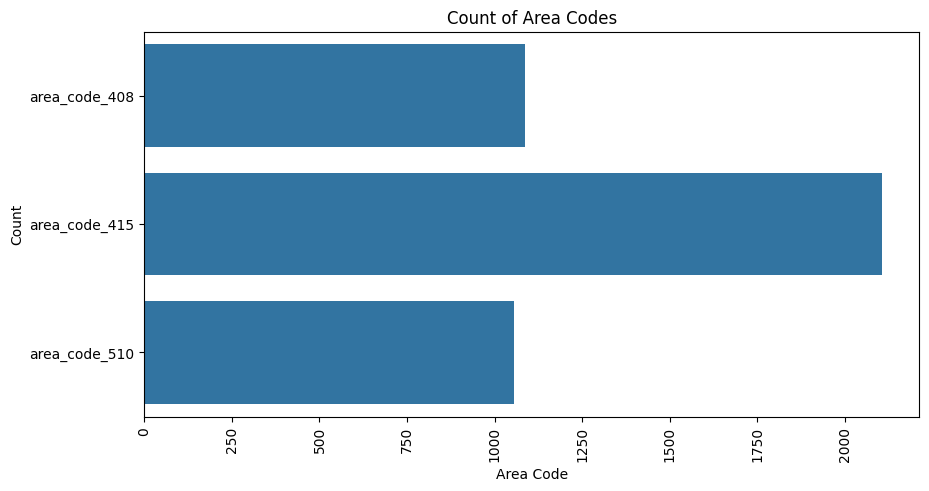

In [66]:
# area_code

plt.figure(figsize=(10,5))
sns.countplot(df['area_code'].sort_values())
plt.xticks(rotation=90)
plt.title('Count of Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

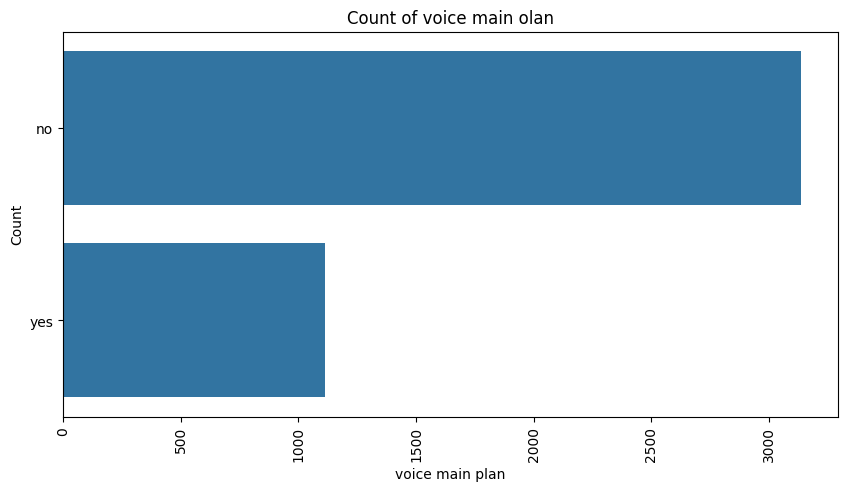

In [67]:
# Voice mail plan

plt.figure(figsize=(10,5))
sns.countplot(df['voice_mail_plan'].sort_values())
plt.xticks(rotation=90)
plt.title('Count of voice main olan')
plt.xlabel('voice main plan')
plt.ylabel('Count')
plt.show()

not_churned:  3652 , churned:  598


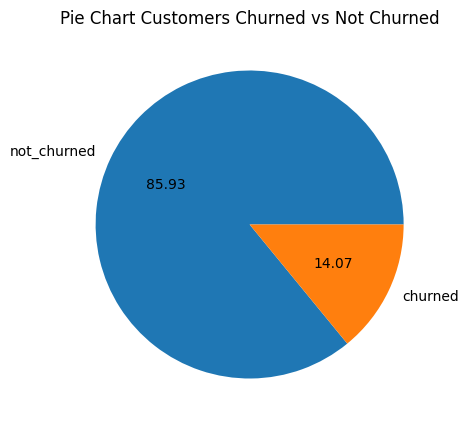

In [68]:
not_churned = df[df['churn']=='no']['churn'].count()
churned = df[df['churn']=='yes']['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5))
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned vs Not Churned')
plt.show()


## Label Data Encoder

In [69]:
print(df['churn'].unique())


['no' 'yes']


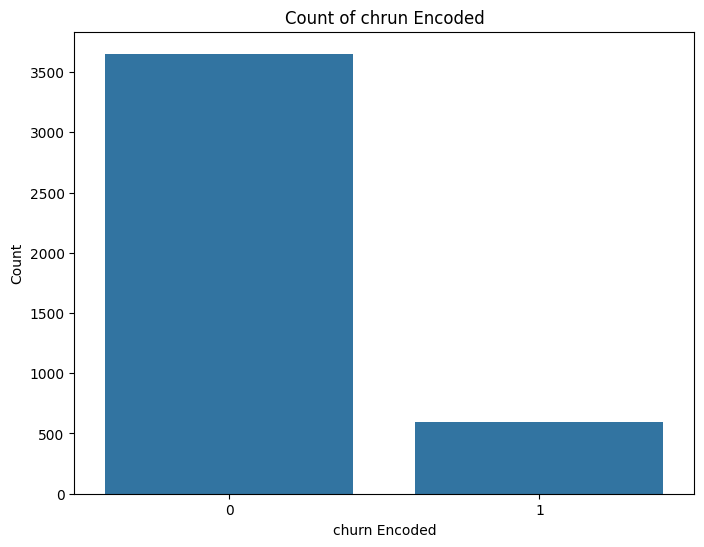

In [70]:
#churn
df['churn'] = df['churn'].map({'no': 0, 'yes': 1})

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Count of chrun Encoded')
plt.xlabel('churn Encoded')
plt.ylabel('Count')
plt.show()

In [71]:
df.drop(columns='state', inplace=True)

In [72]:
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


# Data Preprocessing

## Data Splitting

proporsi pembagian data pada proses ini yaitu 80:10:10

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=0.5, stratify=y_rest, random_state=2)


print("Ukuran data training:", X_train.shape)
print("Ukuran data development:", X_dev.shape)
print("Ukuran data test:", X_test.shape)



Ukuran data training: (3400, 18)
Ukuran data development: (425, 18)
Ukuran data test: (425, 18)


In [74]:
df.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Feature Encoding

In [75]:
df.dtypes

account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [76]:
# df['state'].unique()

In [77]:
X_train.shape

(3400, 18)

In [78]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# state_encoder = OneHotEncoder().fit(X_train[['state']])
area_code_encoder = OneHotEncoder(sparse=False).fit(X_train[['area_code']])
international_plan_encoder = OrdinalEncoder().fit(X_train[['international_plan']])
voice_mail_plan_encoder = OrdinalEncoder().fit(X_train[['voice_mail_plan']])

# Transformasi pada data pelatihan
train_encoded = X_train.assign(
    # state = state_encoder.transform(X_train[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_train[['area_code']]),
    international_plan = international_plan_encoder.transform(X_train[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_train[['voice_mail_plan']])
)
# Transformasi pada data pengujian
test_encoded = X_test.assign(
    # state = state_encoder.transform(X_test[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_test[['area_code']]),
    international_plan = international_plan_encoder.transform(X_test[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_test[['voice_mail_plan']])
)
dev_encoded = X_dev.assign(
    # state = state_encoder.transform(X_dev[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_dev[['area_code']]),
    international_plan = international_plan_encoder.transform(X_dev[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_dev[['voice_mail_plan']])
)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
train_encoded

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3037,69,1.0,0.0,1.0,38,272.9,122,46.39,188.4,97,16.01,132.4,87,5.96,10.5,3,2.84,2
353,163,0.0,0.0,0.0,0,122.4,129,20.81,113.4,108,9.64,180.2,97,8.11,12.5,7,3.38,1
3770,88,0.0,0.0,1.0,37,181.7,88,30.89,237.4,106,20.18,209.1,111,9.41,9.5,5,2.57,2
921,116,0.0,0.0,1.0,35,200.4,104,34.07,272.8,89,23.19,214.5,100,9.65,8.3,4,2.24,1
4056,62,1.0,0.0,0.0,0,119.3,94,20.28,224.0,81,19.04,156.7,78,7.05,12.1,6,3.27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,39,0.0,0.0,0.0,0,185.0,113,31.45,106.5,125,9.05,167.3,78,7.53,12.0,2,3.24,0
2505,125,0.0,0.0,0.0,0,233.3,65,39.66,209.8,93,17.83,210.6,109,9.48,9.1,4,2.46,1
2101,48,0.0,0.0,0.0,0,149.2,146,25.36,161.9,109,13.76,197.9,109,8.91,8.3,2,2.24,3
3771,169,1.0,0.0,0.0,0,240.7,119,40.92,141.1,102,11.99,120.6,56,5.43,7.7,2,2.08,2


In [80]:
train_encoded.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [81]:
y_train

3037    0
353     0
3770    0
921     0
4056    1
       ..
3514    0
2505    0
2101    0
3771    0
2418    0
Name: churn, Length: 3400, dtype: int64

## Handling Imbalance Data

karena tingkat imbaalance data tinggi, maka dilakukan teknik imbalance sampling menggunakan 3 percobaan yaitu over sampling dengan menggunakan SMOTE, random under sampler, dan random over sampler.

In [82]:
a = pd.Series(y_train).value_counts().reset_index()
a.columns=['churn','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,churn,total,%
0,0,2922,85.941
1,1,478,14.059


In [83]:
b = train_encoded['voice_mail_plan'].value_counts().reset_index()
b.columns = ['voice_mail_plan', 'total']
b['%'] = round(b['total'] * 100 / b['total'].sum(), 3)
b

,voice_mail_plan,total,%
0,0.0,2527,74.324
1,1.0,873,25.676


In [84]:
c = train_encoded['international_plan'].value_counts().reset_index()
c.columns = ['international_plan', 'total']
c['%'] = round(b['total'] * 100 / c['total'].sum(), 3)
c

,international_plan,total,%
0,0.0,3077,74.324
1,1.0,323,25.676


In [85]:
from imblearn import under_sampling, over_sampling
X_train_under1, y_train_under1= under_sampling.RandomUnderSampler(sampling_strategy='auto').fit_resample(train_encoded, y_train)
X_train_over1, y_train_over1= over_sampling.RandomOverSampler(sampling_strategy='auto').fit_resample(train_encoded, y_train)
X_train_smote, y_train_smote= over_sampling.SMOTE(sampling_strategy='auto').fit_resample(train_encoded, y_train)

In [86]:
# before vs after imbance sampling
print("before :",train_encoded.shape)
print("after SMOTE:", X_train_smote.shape)
print("after under sampling:", X_train_under1.shape)
print("after over sampling:", X_train_over1.shape)

before : (3400, 18)
after SMOTE: (5844, 18)
after under sampling: (956, 18)
after over sampling: (5844, 18)


***untuk mengurangi overfitting pada maka digunanakna teknik SMOTE karena dinilai lebih baik dalam menangani overfitting dibandingkan dengan teknik lain***

In [87]:
a = pd.Series(y_train_smote).value_counts().reset_index()
a.columns=['churn after smote','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,churn after smote,total,%
0,0,2922,50.0
1,1,2922,50.0


# Pipeline

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False))
])

label_encoder_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])


preprocessor_pipeline = ColumnTransformer([
    ('onehot', onehot_pipeline, ['area_code']),
    ('label_encoder', label_encoder_pipeline, ['voice_mail_plan', 'international_plan'])
])

# Define SMOTE pipeline
smote_pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy='auto'))
])

pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('smote', smote_pipeline)
])

# Fit the pipeline to X_train
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['area_code']),
                                                 ('label_encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['voice_mail_plan',
                                                   'international_plan'])])),
                ('smote', Pipeline(steps=[('smote', SMOTE())]))])

In [89]:
preprocessor_pipeline

ColumnTransformer(transformers=[('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(sparse=False))]),
                                 ['area_code']),
                                ('label_encoder',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['voice_mail_plan', 'international_plan'])])

In [90]:
preprocessor_pipeline.fit(X_train)

X_train_preprocessed = preprocessor_pipeline.transform(X_train)
X_test_preprocessed = preprocessor_pipeline.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
# Save the pipeline
import pickle
with open('preprocessor_pipeline.pkl', 'wb') as file:
    pickle.dump(preprocessor_pipeline, file)

In [92]:
with open ('preprocessor_pipeline.pkl', 'rb') as file:
  preprocessor_pipeline = pickle.load(file)

# Modelling

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_model(model, X_train_smote, y_train_smote, X_test, y_test, X_dev, y_dev_pred):

  print("Evaluasi Model dengan  (X_dev):")
  print("Accuracy:", accuracy_score(y_dev, y_dev_pred))
  print("Precision:", precision_score(y_dev, y_dev_pred))
  print("Recall:", recall_score(y_dev, y_dev_pred))
  print("F1-Score:", f1_score(y_dev, y_dev_pred))


## Random Forest

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9576470588235294
Precision: 0.9038461538461539
Recall: 0.7833333333333333
F1-Score: 0.8392857142857143


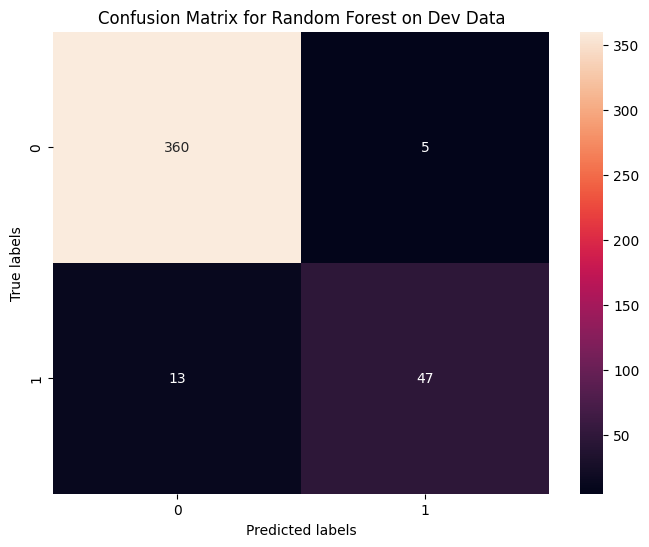

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

y_test_pred = rf.predict(test_encoded)
y_dev_pred = rf.predict(dev_encoded)

eval_model(rf, X_train_smote, y_train_smote, test_encoded, test_encoded, dev_encoded, y_dev_pred)


cm_rf = confusion_matrix(y_dev, y_dev_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## Decision Tree

Evaluasi Model dengan  (X_dev):
Accuracy: 0.8964705882352941
Precision: 0.6176470588235294
Recall: 0.7
F1-Score: 0.65625


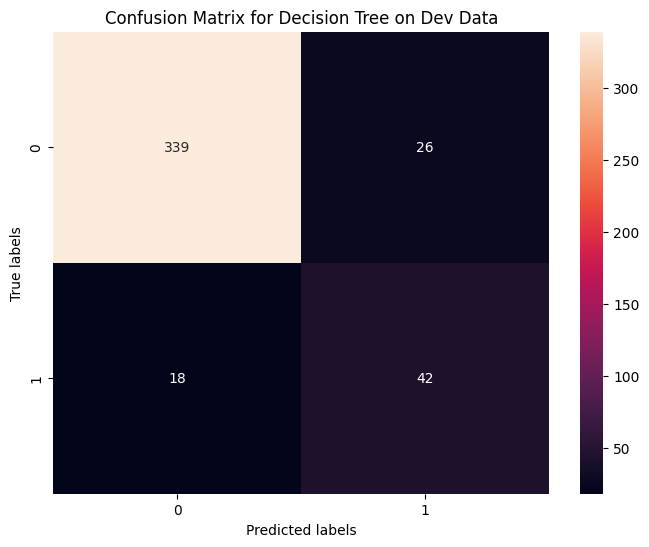

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_smote, y_train_smote)

y_test_pred = rf.predict(test_encoded)
y_dev_pred = dt.predict(dev_encoded)

eval_model(rf, X_train_smote, y_train_smote,test_encoded, y_test, dev_encoded, y_dev_pred)


cm_dt = confusion_matrix(y_dev, y_dev_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title("Confusion Matrix for Decision Tree on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## SVM

Evaluasi Model dengan  (X_dev):
Accuracy: 0.8847058823529412
Precision: 0.5964912280701754
Recall: 0.5666666666666667
F1-Score: 0.5811965811965812


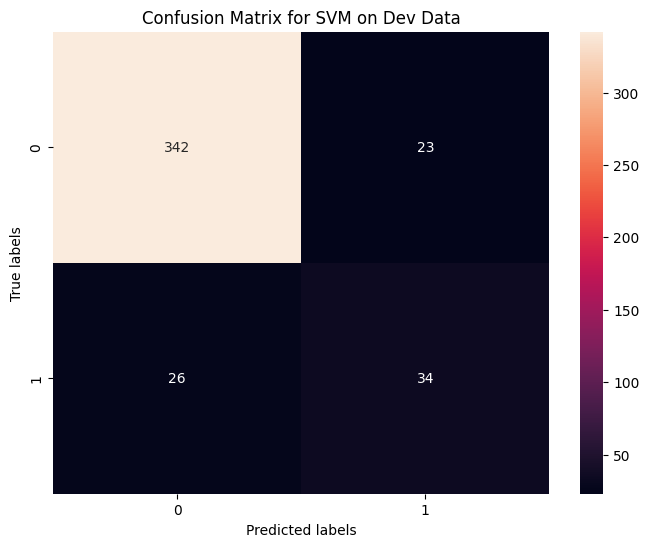

In [96]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

y_test_pred = rf.predict(test_encoded)
y_dev_pred = svm_model.predict(dev_encoded)

eval_model(svm_model, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)

cm_svm = confusion_matrix(y_dev, y_dev_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Hyperparameter Tunning

In [97]:
# Random Forest

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rf = RandomForestClassifier(random_state=1)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

hyperparameters = {
    'max_depth': [5, 10, 25, 50],
    'min_samples_split': [5, 10, 25, 50, 100],
    'min_samples_leaf': [25, 50, 100, 125],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi GridSearchCV dengan model dan grid hyperparameter
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring='accuracy')
rf_tuned.fit(X_train_smote, y_train_smote)

y_dev_pred = rf_tuned.predict(dev_encoded)
y_test_pred = rf_tuned.predict(test_encoded)
eval_model(rf_tuned, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9458823529411765
Precision: 0.8245614035087719
Recall: 0.7833333333333333
F1-Score: 0.8034188034188033


In [98]:
# Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameters = {
    'max_depth': [5, 10, 25, 50],
    'min_samples_split': [5, 10, 25, 50, 100],
    'min_samples_leaf': [25, 50, 100, 125],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='accuracy')
dt_tuned.fit(X_train_smote, y_train_smote)

y_dev_pred = dt_tuned.predict(dev_encoded)
y_test_pred = dt_tuned.predict(test_encoded)
eval_model(dt_tuned, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9223529411764706
Precision: 0.7547169811320755
Recall: 0.6666666666666666
F1-Score: 0.7079646017699115


hasil perbandingan dari hyperparameter tunning menunjukkan bahwa akurasi menggunakakn random forest lebih tinggi dibandingkan Decision Tree dan SVM, oleh karana itu untuk data testing digunakan model Random Forest

# Load Data Testing

In [113]:
from google.colab import drive
drive.mount('/content/drive')
data_test = pd.read_csv('/content/drive/MyDrive/challange2/Data Test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
data_test.dtypes

id                                 int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [115]:
# data_test.drop([
#     'total_day_minutes', 'total_night_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_day_calls', 'total_night_calls', 'total_eve_calls'],
#     axis=1,
#     inplace=True)

In [116]:
data_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [117]:
data_test.drop(columns='id', axis=1, inplace=True)

In [118]:
data_test.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [119]:
# # Load the pipeline
# with open('preprocessor_pipeline.pkl', 'rb') as file:
#     preprocessor_pipeline= pickle.load(file)

In [120]:
# preprocess_test = preprocessor_pipeline.transform(data_test)
# preprocess_test.shape

In [121]:
data_test.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [122]:
#label encoder manual data testing

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Fitur Encoding One-Hot pada Data Uji
area_code_encoder = OneHotEncoder(sparse=False).fit(data_test[['area_code']])

# Transformasi Data Uji
data_test_encoded = data_test.copy()
data_test_encoded['area_code'] = area_code_encoder.transform(data_test[['area_code']])

# Encoding Fitur Internasional Plan
data_test_encoded['international_plan'] = international_plan_encoder.transform(data_test[['international_plan']])

# Encoding Fitur Voice Mail Plan
data_test_encoded['voice_mail_plan'] = voice_mail_plan_encoder.transform(data_test[['voice_mail_plan']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [123]:
data_test_encoded.drop(columns='state', inplace=True)

In [124]:
data_test_encoded

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0.0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,0.0,1.0,0.0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0.0,0.0,0.0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0.0,0.0,0.0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0.0,0.0,0.0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0.0,0.0,0.0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,73,1.0,0.0,0.0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,152,0.0,0.0,0.0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,61,0.0,0.0,0.0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [125]:
predict_test = rf_tuned.predict(data_test_encoded)
predict_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Save to PDF result prediction using Random Forest Classifier

In [126]:
result = pd.DataFrame({'Prediction' : predict_test})

In [127]:
# result.to_csv('predicted_results.csv', index=False)

In [128]:
# from google.colab import files

# files.download('predicted_results.csv')
